# Training MIMOnet

MIMO: Multiple Input Multiple Outputs.

In [1]:
input_patch_size = [350,350] # input patch (expect output to be smaller)
input_channels = [3] # RGB
output_channels = [2] #cell and bkg
NBATCH = 5 # example patch per batch
EPCS = 200 # epochs
REG = True # regularization
USEW = False # use weights
NAME_NET = 'MIMO_1' # name for saving
JT = False # Just train set means no evaluation during training 

In [2]:
import keras
import sys
sys.path.append('../')
from datasets import CD_Dataset
from models import MimoNet
from utility import show_batches, from_categorical, train, evaluate
import numpy as np
from datasets import combine_y_w
import keras
import time
import matplotlib.pyplot as plt

seed = int((time.time()*1e6)%1e6)
np.random.seed(seed)
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=seed)

dataset_path = '../CD_Dataset'
trained_models_path = '../trained_models'

Using TensorFlow backend.


('mean_features: ', array([ 0.86503507,  0.83272585,  0.72929356]))
('std_features: ', array([ 0.01255889,  0.01785996,  0.05625756]))


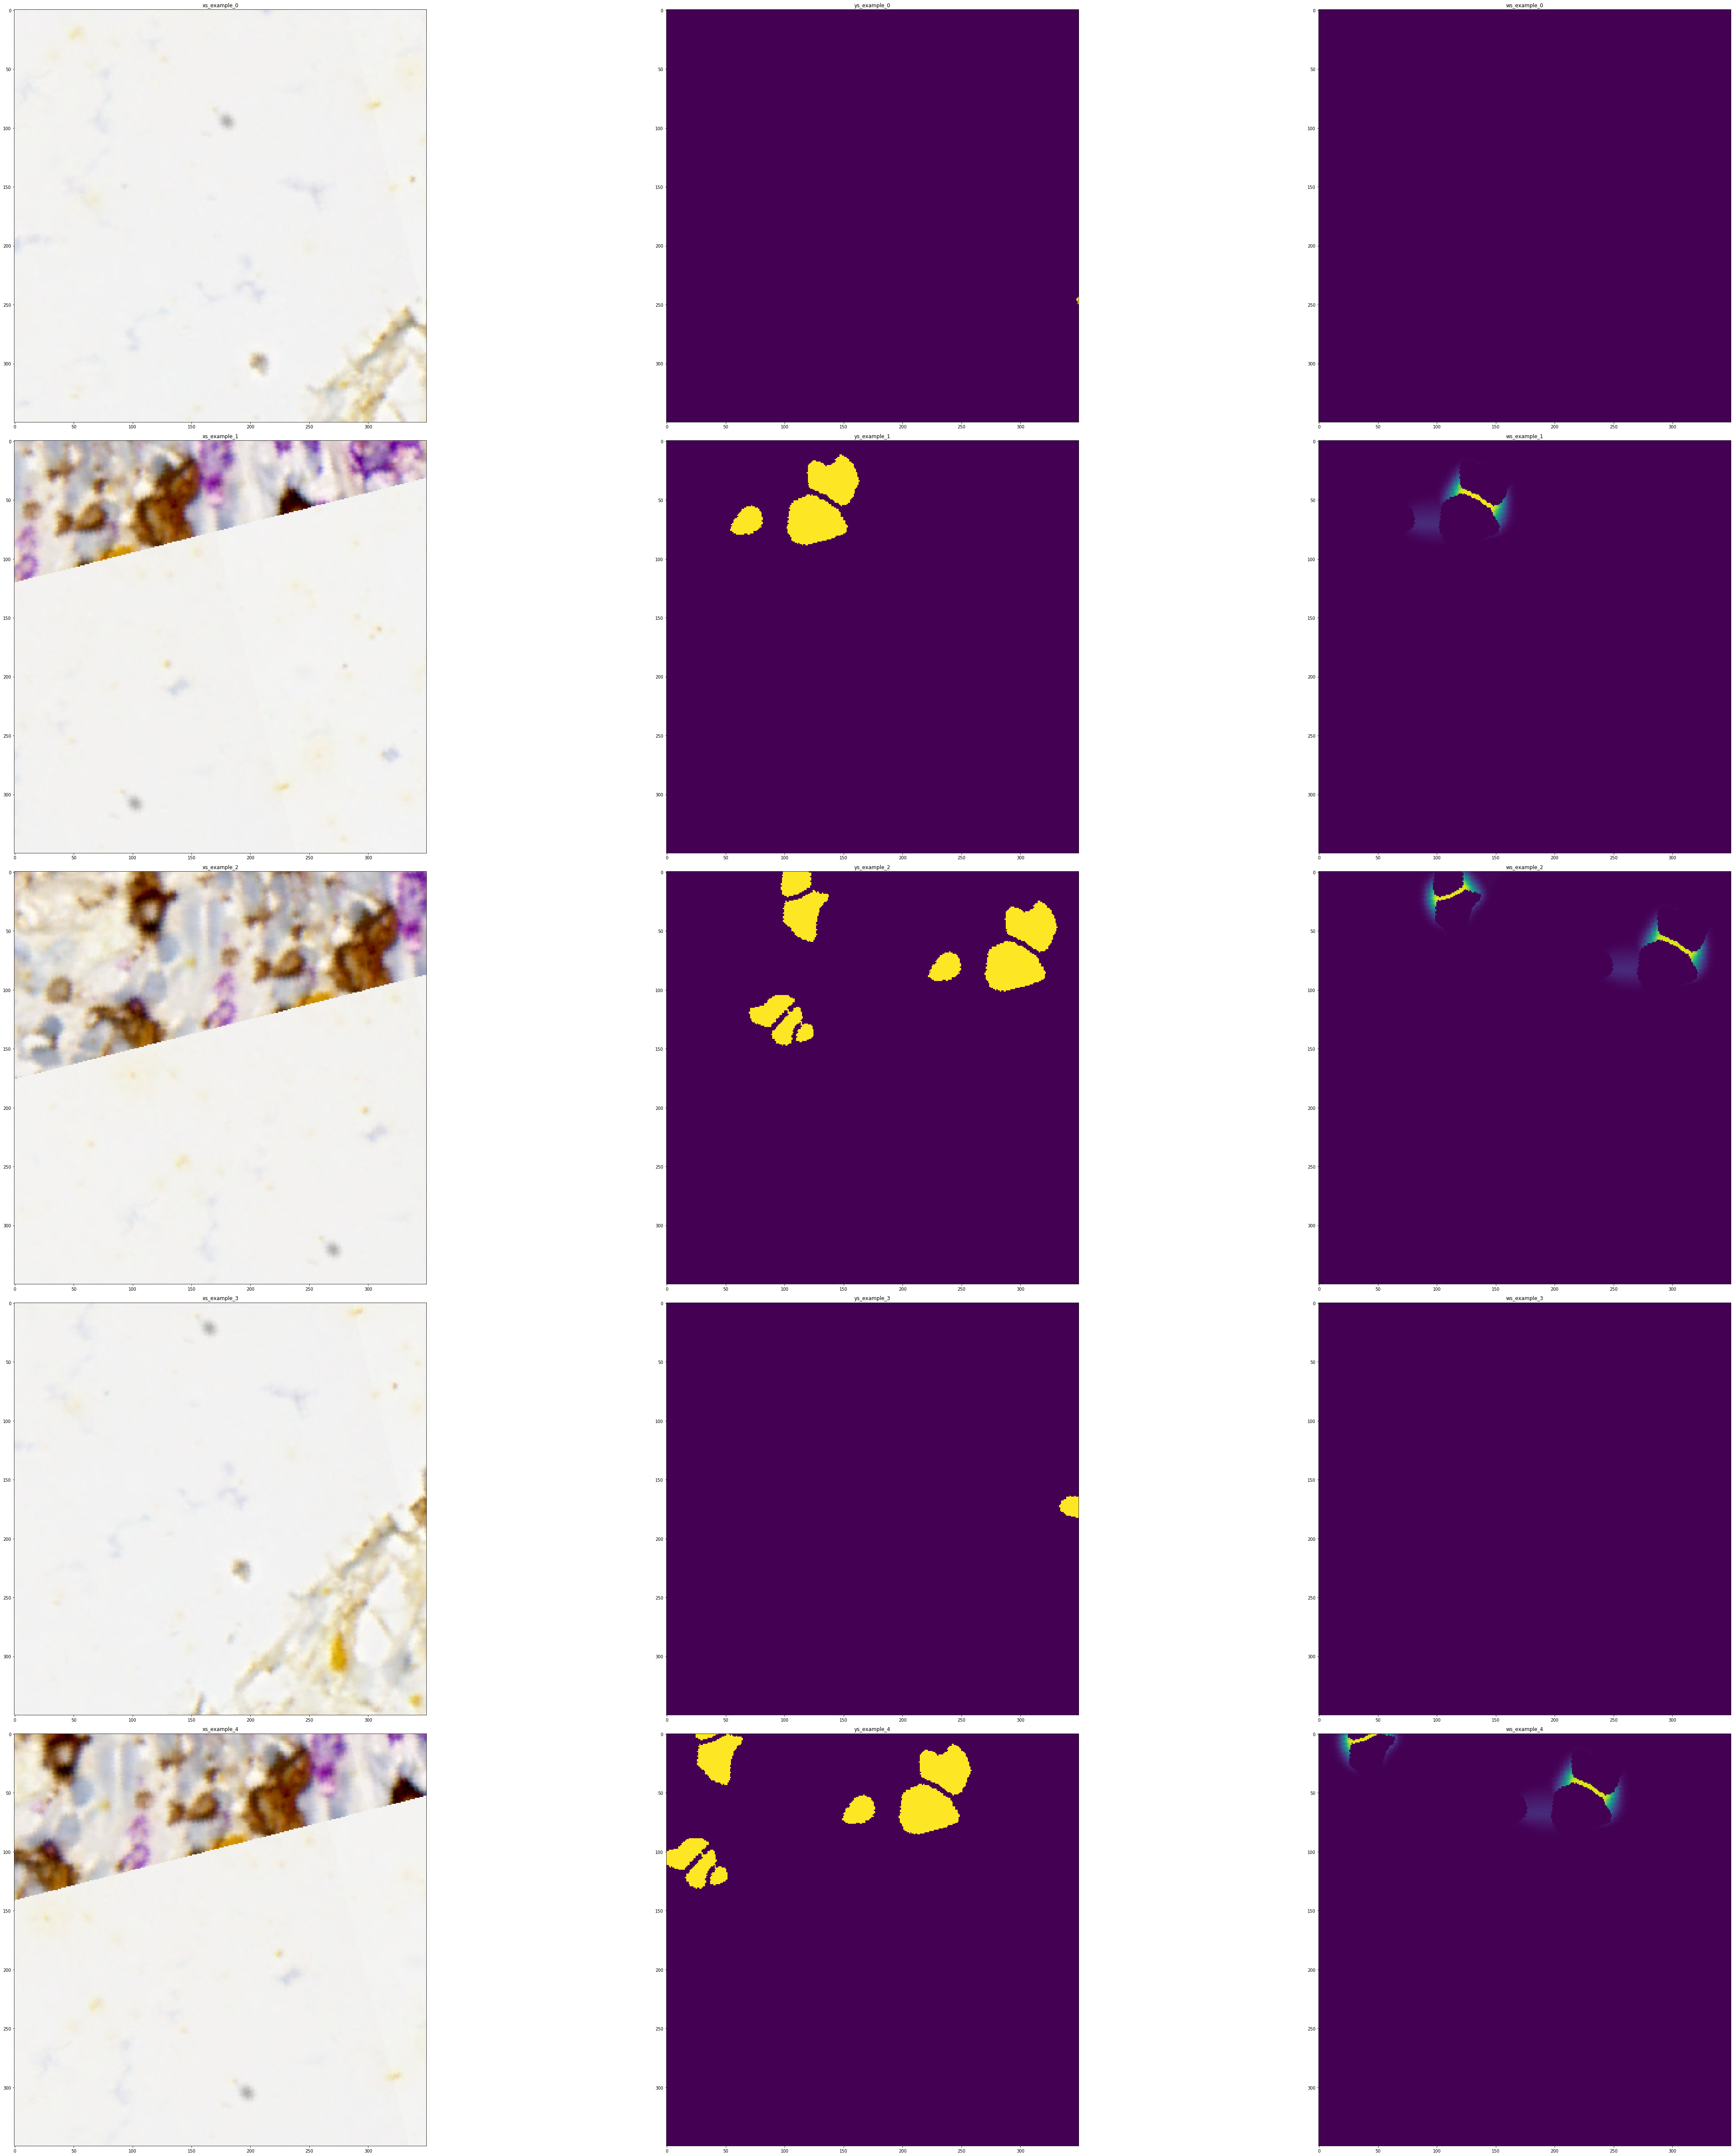

In [ ]:
dataset = CD_Dataset( path=dataset_path, train_y_path="train_y",  eval_y_path="eval_y",  fit=True, download=True, num_classes=output_channels[0] )

means = dataset.mean_features()
stds = dataset.std_features()
xs,ys,ws= dataset.sample_X_Y_W_patch_batch(input_patch_size,n_batch=5 ,fit=False)
ys_imgs = from_categorical(ys)
show_batches([xs,ys_imgs,ws],["xs","ys","ws"])

In [ ]:
model_input_size = input_patch_size + input_channels
mimo = MimoNet(model_input_size, classes=output_channels[0], regularized=REG)
histo = train(mimo,dataset,n_batch=NBATCH,epochs=EPCS,just_train=JT,use_weights=USEW)

=========== iteration 1/200 =============


/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Epoch 1/1


In [ ]:
mimo.save_model(NAME_NET)
eval_histo = np.array(histo[0])
train_histo = np.array(histo[1])
train_histo.dump(NAME_NET+'_train_histo.pkl')
eval_histo.dump(NAME_NET+'_eval_histo.pkl')

In [4]:
model_input_size = input_patch_size + input_channels
mimo = MimoNet(model_input_size, classes=output_channels[0], regularized=True)
mimo.load_model(NAME_NET)
train_histo = np.load(NAME_NET+'_train_histo.pkl')
eval_histo = np.load(NAME_NET+'_eval_histo.pkl')

/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


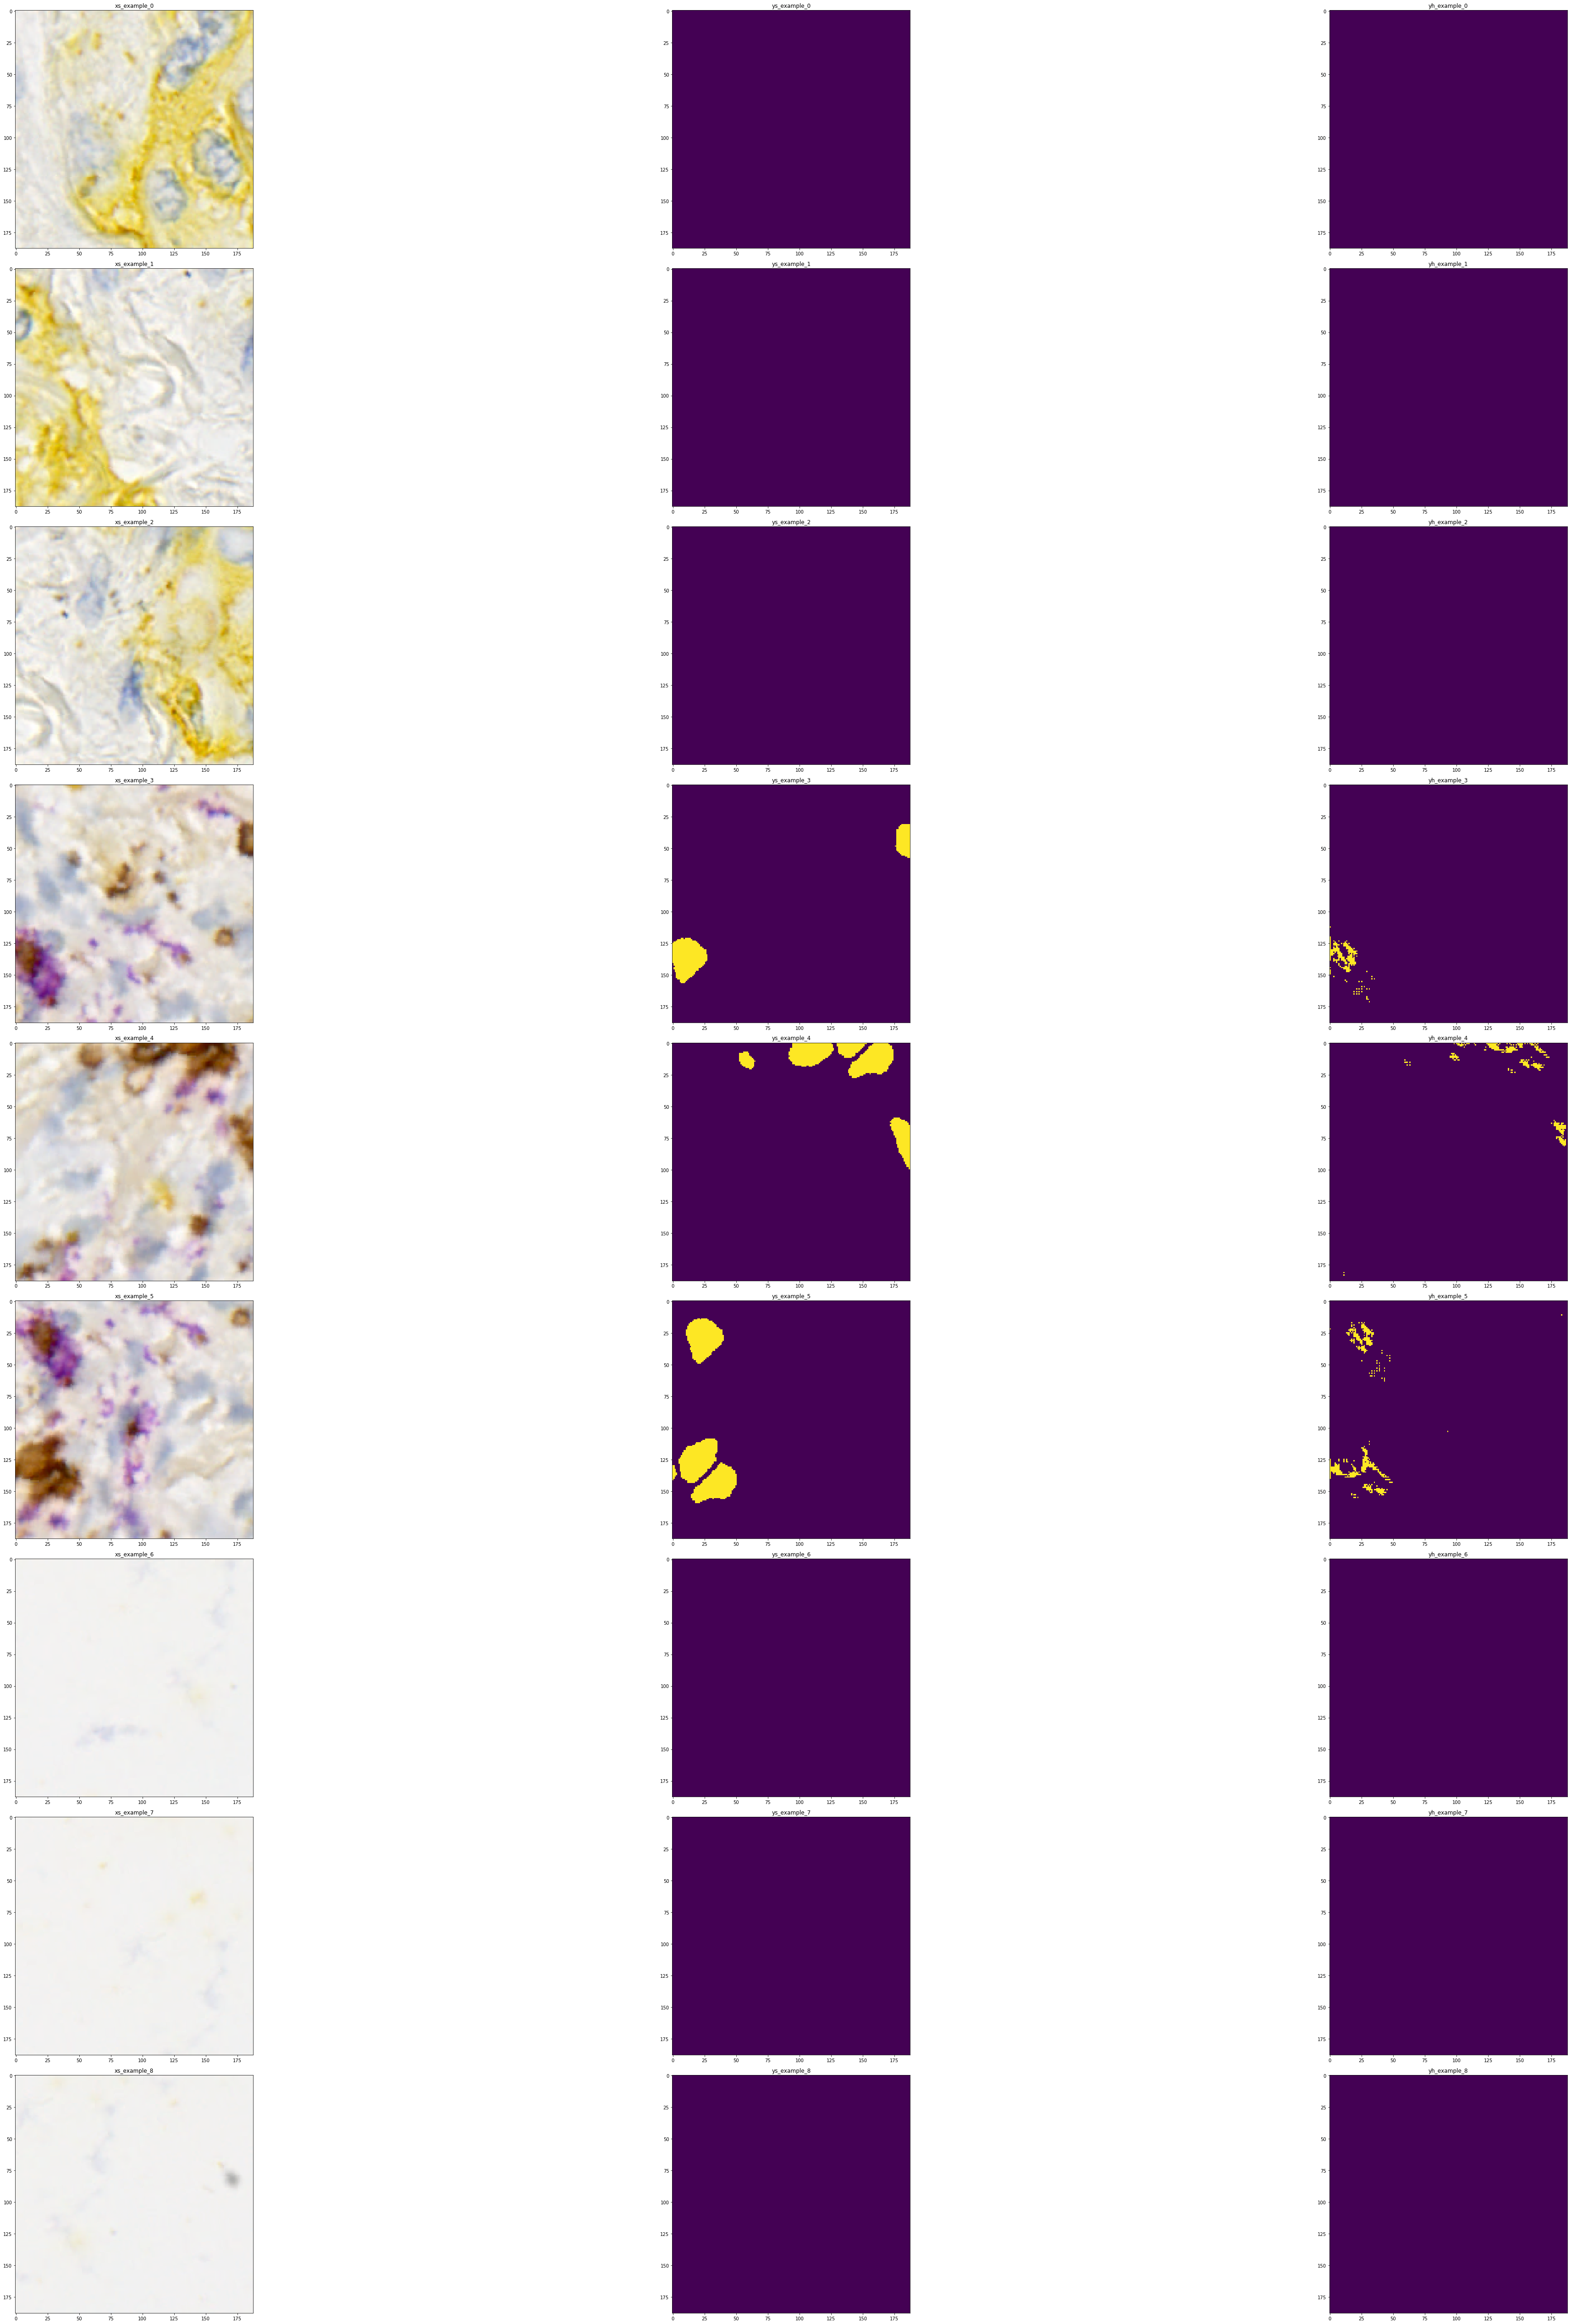

In [7]:
x_,y_,y_hat = evaluate(mimo,dataset)
y_imgs = from_categorical(y_)
y_hat_imgs = from_categorical(y_hat)
show_batches([(x_*stds)+means,y_imgs,y_hat_imgs],["xs","ys","yh"])

In [16]:
xs,ys,ws= dataset.sample_X_Y_W_patch_batch(input_patch_size,n_batch=5)
ys_imgs = from_categorical(ys)
#show_batches([(xs*stds)+means,ys_imgs,ws],["xs","ys","ws"])

/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(5, 188, 188)
(5, 350, 350)


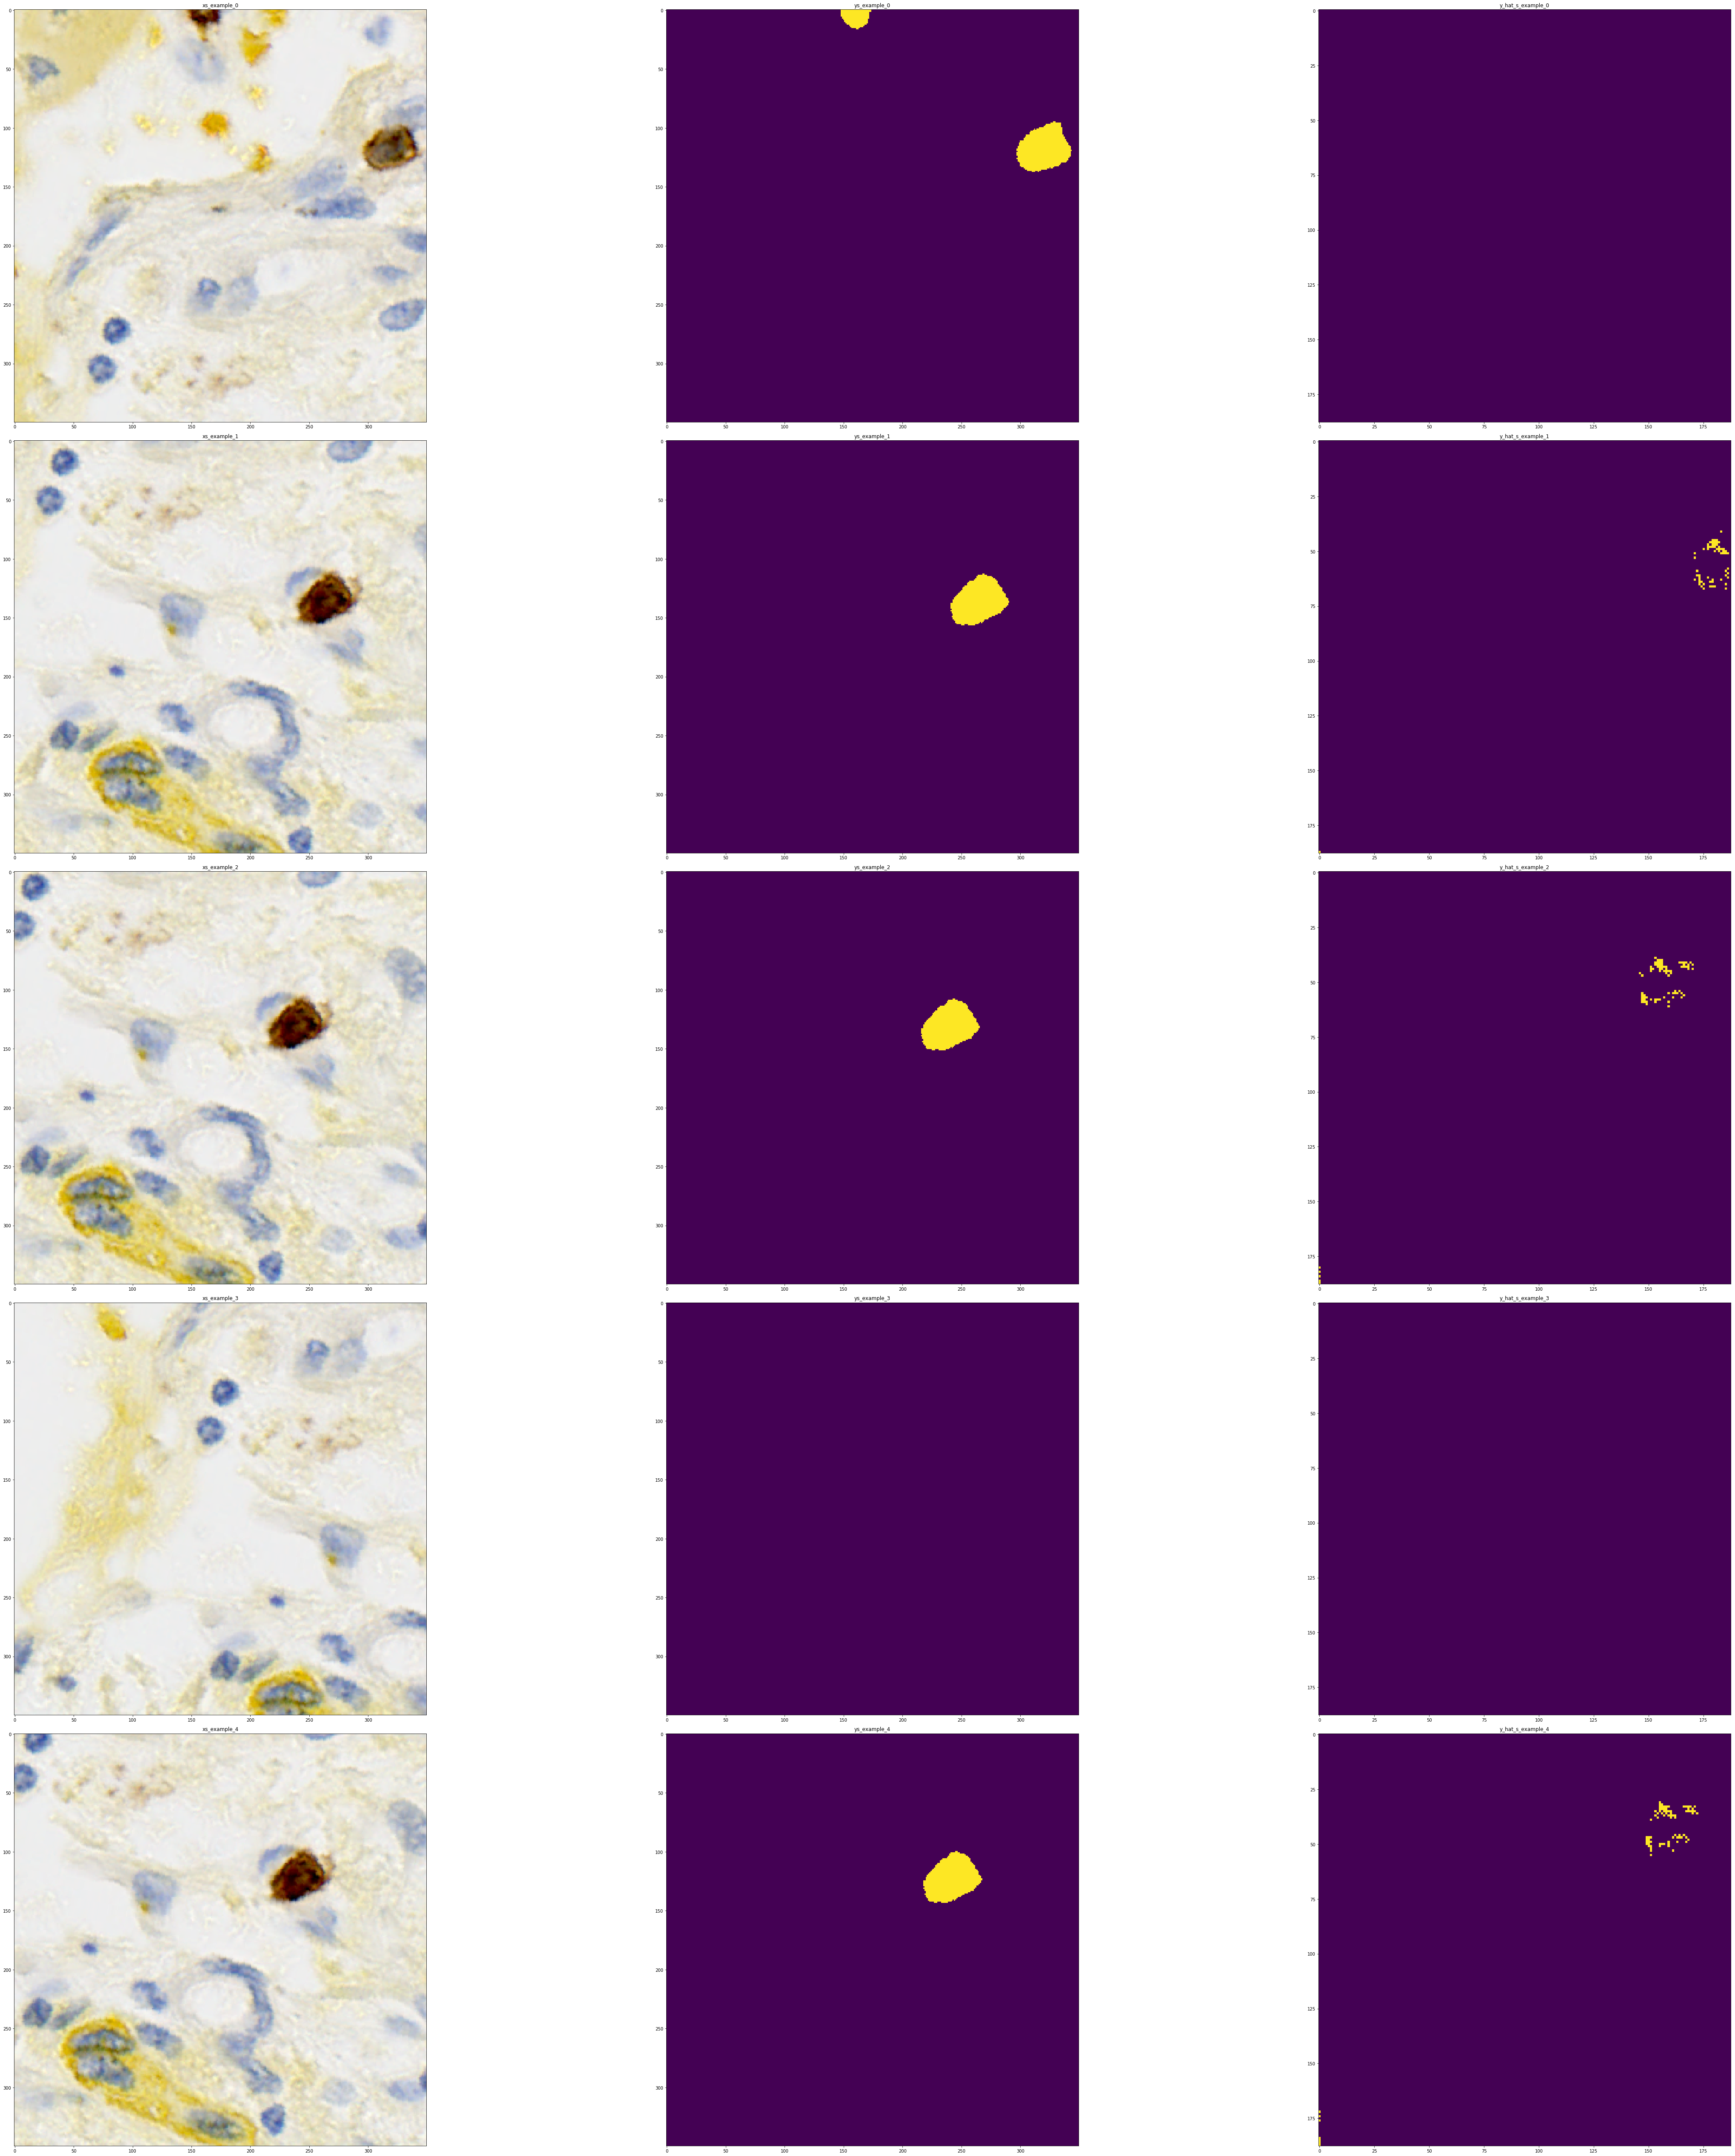

In [19]:
y = mimo.predict(xs)
y_hat_imgs = from_categorical(y[3])
print(y_hat_imgs.shape)
print(ys_imgs.shape)
show_batches([(xs*stds)+means,ys_imgs,y_hat_imgs],["xs","ys","y_hat_s"])